In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

for i in range(1,15):
    if(i<8):
        csv_now = pd.read_excel("./excel/"+str(i)+".xlsx",header=1)
    else:
        csv_now = pd.read_excel("./excel/"+str(i)+".xlsx",header=0)
    if i ==1:
        csv1 = csv_now.drop(columns = ['author'])
    else:
        csv1 = pd.concat([csv1,csv_now.drop(columns = ['author'])],ignore_index=True)

In [17]:
csv1.loc[csv1['comment'].str.contains('由 Google 提供翻譯',na=False)] = 'None'
csv1.loc[csv1['comment'].str.len() < 15] = 'None'
csv1 = csv1.replace(to_replace='None', value=np.nan).dropna()
csv1[['grade']] = csv1[['grade']].astype(np.int64)

<AxesSubplot:>

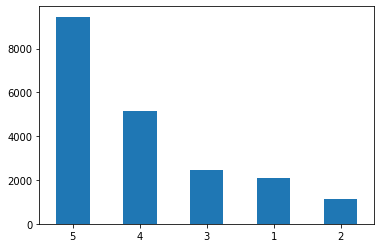

In [18]:
csv1['grade'].value_counts().plot(kind='bar',rot=0)

In [19]:
star1 = csv1[csv1['grade'] ==1]
star2 = csv1[csv1['grade'] ==2]
star3 = csv1[csv1['grade'] ==3]
star3 = star3.sample(2200)
star4 = csv1[csv1['grade'] ==4]
star4 = star4.sample(2200)
star5 = csv1[csv1['grade'] ==5]
star5 = star5.sample(2200)
csv1 = pd.concat([star1,star2,star3,star4,star5],ignore_index=True)
print(csv1.shape)
csv1

(9846, 2)


,grade,comment
0,1,今天外帶招牌牛肉鍋\n高麗菜沒煮熟..有點菜味\n芋頭也沒熟\n冬粉也太硬\n\n要外帶的人...
1,1,印象中每次經過都很多人在外面等，出於好奇來吃吃看～沒想到是送來一鍋料都塞滿了，豬肉很硬又黏在...
2,1,5/20晚上17:15分左右電話訂2鍋外帶，在18:30左右電聯通知會晚點去拿，接電話的人說...
3,1,電話訂餐時重複確認過餐點 (起士雞肉)，到場取餐也有再次確認\n但實際拿到的餐點不管湯底或肉...
4,1,一鍋兩飲料 付錢295只給鍋沒給飲料\n還要跑第二趟過去拿\n一點道歉意思都沒有一副要你快...
...,...,...
9841,5,環境不錯，假日客人很多，要先預定位子比較好
9842,5,肉質不錯，服務員很親切，用餐整體下來感覺都很好～！
9843,5,起司牛奶鍋好吃，飲料也好喝，每來台中必吃👍
9844,5,男的帥 ，女的漂亮 。吃燒肉也享人文風景 。服務人員超讚 。


<AxesSubplot:>

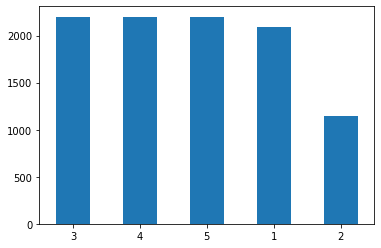

In [20]:
csv1['grade'].value_counts().plot(kind='bar',rot=0)

In [3]:
def convertScore(score): 
     if int(score) >= 4:
          return 'good'
     elif int(score) == 3:
          pass
     else:
          return 'bad'


def Convert(google):
     google['status'] = google['grade'].map(lambda e : convertScore(e))
     google = google[google['status'].isin(['good', 'bad'])]
     google['status'] = google['status'].replace({'good':1, 'bad': 0})
     google = google.drop(columns = ['grade'])
     return google



C:\Users\Linus\AppData\Local\Temp/ipykernel_36560/1734745602.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['status'] = google['status'].replace({'good':1, 'bad': 0})


                                                 comment  status
0      這家當地人超推\n珍珠奶茶是奶蓋，很奶很棒\n火鍋料非常多  料多超實在\n用餐時間人很多，...       1
1      每鍋價格180-200，料好實在，比起同性質的小火鍋， CP值超高。肉都有6-7片，火鍋料至...       1
2      來台中必吃的愛店\n聽說牛奶鍋超讚\n但我是點泰式酸辣鍋\n香料味很重很喜歡\n那個酸跟辣很...       1
3                       泡菜鍋真的很夠味，魚酥給的大方，吃了開心，下次想買回家自己煮加料       1
4      以前就常常跟朋友聚餐來吃～今天吃吃辣味起司豬肉鍋～對於不敢吃單吃起司鍋的我 這個辣味起司鍋真...       1
...                                                  ...     ...
31212    推薦給喜歡吃燒烤的朋友們\n服務品質很讚👍\n\n非常喜歡店內氛圍\n服務人員的服務都很到位👍       1
31213  很棒的烤肉經驗，場地座位都超大，套餐內容豐富，我們點的是1980的豐禾豚肉套餐，有鮭魚味噌湯...       1
31480                                                  …       1
31493                                                 👍🏻       1
31515                                                👍👍👍       1

[20679 rows x 2 columns]


Some weights of the model checkpoint at hfl/chinese-bert-wwm-ext were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkp

  0%|          | 0/16543 [00:00<?, ?it/s]

C:\Python39\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/2068 [00:00<?, ?it/s]

C:\Python39\lib\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
C:\Python39\lib\site-packages\simpletransformers\classification\classification_model.py:1442: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/4136 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/517 [00:00<?, ?it/s]

{'mcc': 0.8087241072066188, 'tp': 3669, 'tn': 329, 'fp': 82, 'fn': 56, 'auroc': 0.9839863485687227, 'auprc': 0.9980152075322426, 'f1': 0.9815409309791333, 'acc': 0.9666344294003868, 'eval_loss': 0.12113931544514182}


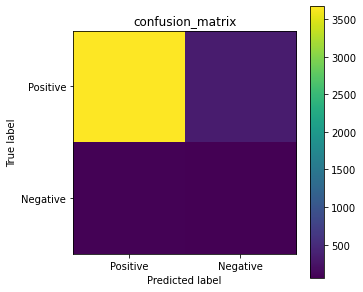

In [4]:
# 2 lobel version
csv1 = Convert(csv1)

csv1.loc[csv1['comment'].str.contains('由 Google 提供翻譯',na=False)] = 'None'
csv_2label = csv1.replace(to_replace='None', value=np.nan).dropna()
csv_2label[['status']] = csv_2label[['status']].astype(np.int64)
print(csv_2label)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
train_df, test_df = train_test_split(csv_2label, test_size = 0.2, random_state = 927)

from simpletransformers.classification import ClassificationModel
#?ClassificationModel
model = ClassificationModel('bert', 'hfl/chinese-bert-wwm-ext')
model.train_model(train_df, args = {'overwrite_output_dir': True})
result, model_output, wrong_predictions = model.eval_model(test_df,f1=f1_score,acc=accuracy_score)

G_Confusion = [[result['tp'],result['tn']],[result['fp'],result['fn']]]

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(G_Confusion)
plt.title('confusion_matrix')
plt.colorbar()
num = np.array(range(len(['Positive','Negative'])))    
plt.xticks(num, ['Positive','Negative'])    
plt.yticks(num, ['Positive','Negative'])
plt.ylabel('True label')    
plt.xlabel('Predicted label')
print(result)

Some weights of the model checkpoint at hfl/chinese-bert-wwm-ext were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkp

  0%|          | 0/7876 [00:00<?, ?it/s]

C:\Python39\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/985 [00:00<?, ?it/s]

C:\Python39\lib\site-packages\simpletransformers\classification\classification_model.py:1442: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1970 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/247 [00:00<?, ?it/s]

{'mcc': 0.48584594471044573, 'f1': 0.5934010152284264, 'acc': 0.5934010152284264, 'eval_loss': 0.962242836894294}


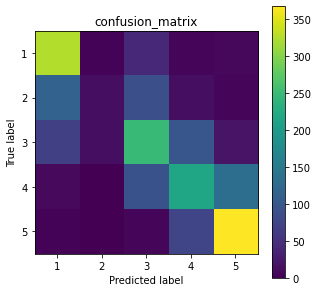

In [21]:
# 5 lobel version

csv1.loc[csv1['comment'].str.contains('由 Google 提供翻譯',na=False)] = 'None'
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

def f1_multiclass(labels,preds):
    return f1_score(labels,preds,average='micro')

csv1 = csv1.replace(to_replace='None', value=np.nan).dropna()
csv1[['grade']] = csv1[['grade']]-1
csv1[['grade']] = csv1[['grade']].astype(np.int64)
csv1 = csv1.reindex(columns=['comment','grade'])

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(csv1, test_size = 0.2, random_state = 927)

from simpletransformers.classification import ClassificationModel
#?ClassificationModel
model = ClassificationModel('bert', 'hfl/chinese-bert-wwm-ext',num_labels=5)
model.train_model(train_df, args = {'overwrite_output_dir': True})

result, model_output, wrong_predictions = model.eval_model(test_df,f1=f1_multiclass,acc=accuracy_score)

origin_label = test_df['grade'].values.tolist()
predict_label = np.argmax(model_output, axis=1).tolist()

G_Confusion = confusion_matrix(origin_label,predict_label)
plt.figure(figsize=(5,5))
plt.imshow(G_Confusion)
plt.title('confusion_matrix')
plt.colorbar()
num = np.array(range(len(['1','2','3','4','5'])))    
plt.xticks(num,['1','2','3','4','5'])
plt.yticks(num, ['1','2','3','4','5'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(result)

In [22]:
test_df

,comment,grade
968,失望！預約3:30卻到4:10才進場，進場後都沒人招待、點餐！還要自行詢問點餐和兒童座椅，兒...,0
6716,攤位雖少但反而精緻，少了名氣廣大的觀光夜市會有的商業氣息，反而才能真正享受夜市的價值，值得推...,3
5143,點1880的套餐\n牛肉腥味很重\n豬肉比牛肉好吃\n整體用餐感覺普普\n\n應該是疫情關係...,2
6529,動線是一長條走廊而非一大片區域，有種要走很遠才能找到想吃食物的感覺，並不是很方便\n食物雖新...,3
9509,第一次吃，11跟19服務生很好，愉快的用餐體驗。,4
...,...,...
1211,給一顆星是真針對某一兩位服務生，不然給一星都嫌奢侈，公司聚會約莫深夜11點被安排進包廂，外面...,0
4586,整體都很好 ，但是空調冷氣需要改進 ！冷氣不涼 太熱 無法好好享用餐點！,2
4110,服務人員都很好\n烤網更換快速\n肉的品質大部分都還不錯,2
7436,口袋準備多點錢，保證吃肉吃到怕；食材新鮮，要先預約！,3


In [39]:
grade=[1,1,1,1,1]
comment=[]
for i in range(5):
    comment.append(input("input your review of "+str(i+1)+" star"))
your_reviews=pd.DataFrame({"comment":comment,
                "grade":grade})

result, model_output, wrong_predictions = model.eval_model(your_reviews,f1=f1_multiclass,acc=accuracy_score)

origin_label = your_reviews['grade'].values.tolist()
predict_label = np.argmax(model_output, axis=1).tolist()

for i in range(5):
    print("your review of star "+str(i+1)+" is rated as "+str(predict_label[i]+1)+" stars")

input your review of 1 star 有夠難吃....菜都臭掉 還有蟑螂 店內衛生不佳 真的很需要加強
input your review of 2 star 用餐體驗不佳 菜也都不太好吃 雖然沒有很貴 但整體還是差評 需要改進的地方有非常多 肉質不好 同樣價位寧願去吃石二鍋
input your review of 3 star 我認為是還可接受的餐廳 普普通通的用餐環境&體驗 大部分都還可以接受啦 有一點點小貴就是 希望價錢可以調整一下 會更棒
input your review of 4 star 還不錯的餐廳! 位置寬敞舒適 我認為菜品大部分也都沒甚麼問題 只剩價錢有一點點小小貴了 但很適合家庭一起來用餐! 好吃!
input your review of 5 star 超級讚...無可挑剔的餐廳 我認為每一道菜品都非常完美 很好吃 很讚的體驗!


C:\Python39\lib\site-packages\simpletransformers\classification\classification_model.py:1442: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/5 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

your review of star 1 is rated as 1 stars
your review of star 2 is rated as 2 stars
your review of star 3 is rated as 3 stars
your review of star 4 is rated as 4 stars
your review of star 5 is rated as 5 stars
